In [1]:
%matplotlib notebook
# %matplotlib tk

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import multiprocessing

from ipywidgets import widgets

import skimage
from skimage import io
from skimage.viewer import ImageViewer


# matplotlib.rcParams['toolbar'] = 'None'



In [4]:
img = io.imread(f'images/im1.bmp')
print(img.shape)
img[:2]

(200, 200, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

<IPython.core.display.Javascript object>


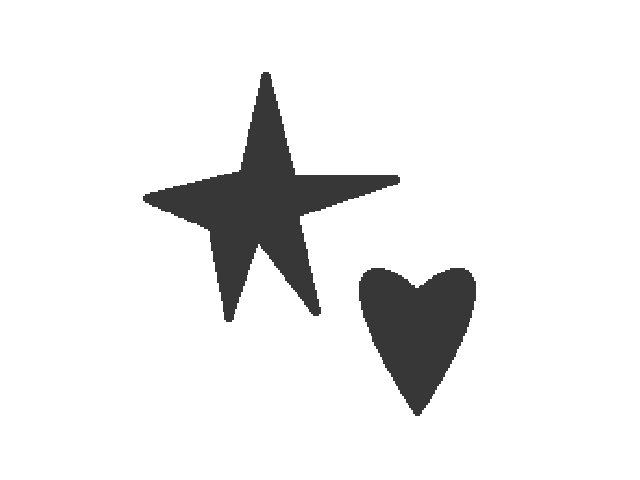

In [5]:
# viewer = ImageViewer(img)
# viewer.show()
f, axarr = plt.subplots(1,1)
axarr.axis('off')
axarr.imshow(img)

<IPython.core.display.Javascript object>


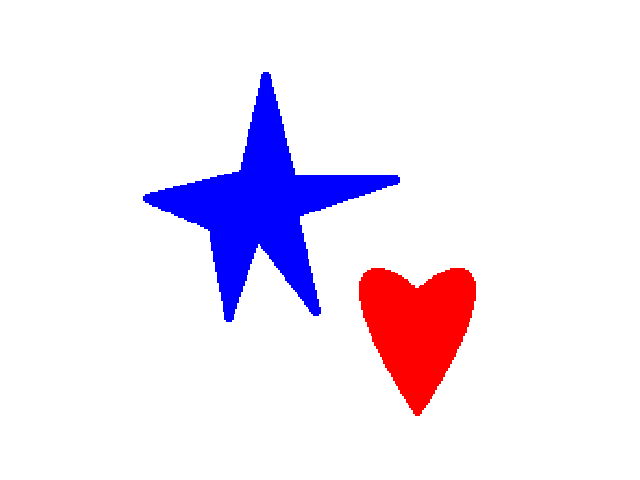

In [48]:
def get_neighs(im, seed_x, seed_y, visited):
    neighs = [
        (seed_x + 1, seed_y),
        (seed_x - 1, seed_y),
        (seed_x, seed_y + 1),
        (seed_x, seed_y - 1),
    ]
    neighs = [n for n in neighs if n[0] >= 0 and n[0] < im.shape[0] and n[1] >= 0 and n[1] < im.shape[1]]
    neighs = [n for n in neighs if n not in visited]
    return neighs

def expand_region(im, seed_x, seed_y):
    in_region = []
    visited = set()
    
    to_visit = [(seed_x, seed_y)]
    while len(to_visit) > 0:
        seed_x, seed_y = to_visit.pop()
        neighs_not_visited = get_neighs(im, seed_x, seed_y, visited)
        for n in neighs_not_visited:
            if im[n[0], n[1], 0] == im[seed_x, seed_y, 0]:
                visited.add(n)
                in_region.append(n)
                to_visit.append(n)

    return in_region

im = img.copy()

obj_pxs = expand_region(im, 8, 65)
for x, y in obj_pxs:
    im[x, y] = (0, 0, 255)

obj_pxs = expand_region(im, 193, 149)
for x, y in obj_pxs:
    im[x, y] = (255, 0, 0)

f, axarr = plt.subplots(1,1)
axarr.axis('off')
axarr.imshow(im)